Running benchmarks without MKL...
Done.

Running benchmarks with MKL...


/opt/anaconda3/lib/python3.11/importlib/__init__.py:169: UserWarning: The NumPy module was reloaded (imported a second time). This can in some cases result in small but subtle issues and is discouraged.
  _bootstrap._exec(spec, module)


Done.



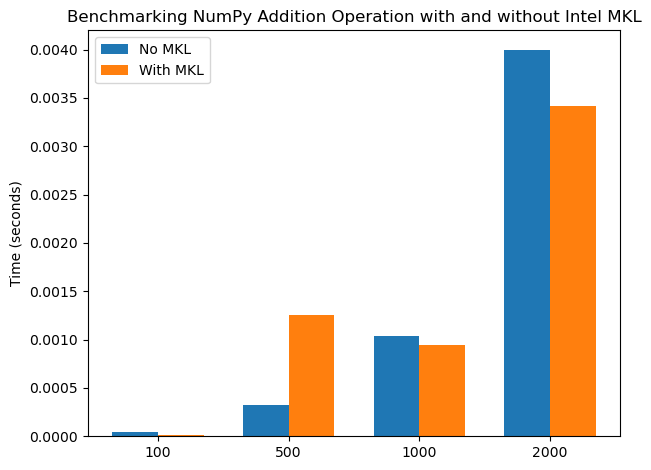

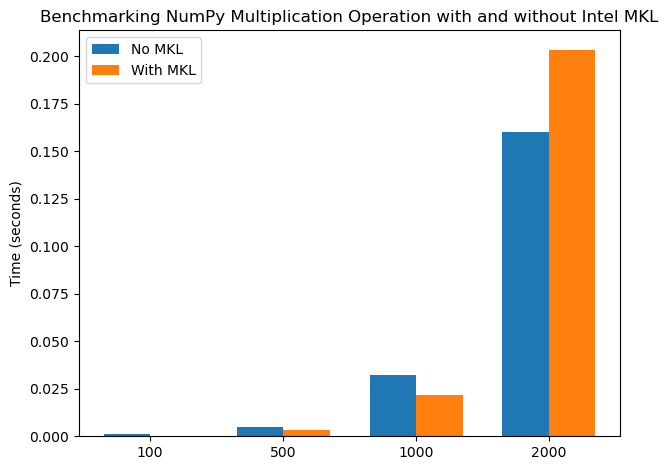

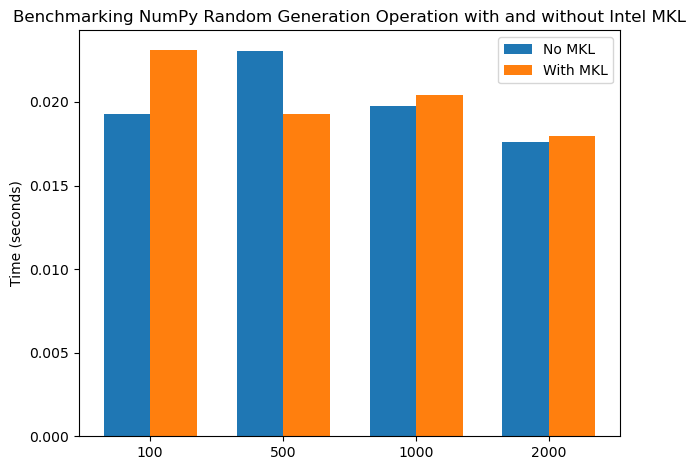


Matrix Size: 100x100
Addition: No MKL = 0.000049 s, With MKL = 0.000008 s, Improvement = 83.54%
Multiplication: No MKL = 0.001130 s, With MKL = 0.000081 s, Improvement = 92.85%
Random Generation: No MKL = 0.019302 s, With MKL = 0.023127 s, Improvement = -19.82%

Matrix Size: 500x500
Addition: No MKL = 0.000326 s, With MKL = 0.001256 s, Improvement = -284.80%
Multiplication: No MKL = 0.005094 s, With MKL = 0.003228 s, Improvement = 36.62%
Random Generation: No MKL = 0.023062 s, With MKL = 0.019274 s, Improvement = 16.43%

Matrix Size: 1000x1000
Addition: No MKL = 0.001039 s, With MKL = 0.000949 s, Improvement = 8.74%
Multiplication: No MKL = 0.032328 s, With MKL = 0.021734 s, Improvement = 32.77%
Random Generation: No MKL = 0.019741 s, With MKL = 0.020437 s, Improvement = -3.53%

Matrix Size: 2000x2000
Addition: No MKL = 0.004000 s, With MKL = 0.003421 s, Improvement = 14.46%
Multiplication: No MKL = 0.160135 s, With MKL = 0.203507 s, Improvement = -27.08%
Random Generation: No MKL = 0

In [7]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
import importlib

def benchmark_operation(operation, setup, num_runs=10):
    times = timeit.repeat(operation, setup=setup, repeat=num_runs, number=1)
    return np.mean(times)


def setup_code(size):
    return f"""
import numpy as np
np.random.seed(42)
a = np.random.rand({size}, {size})
b = np.random.rand({size}, {size})
"""


operations = {
    "Addition": "a + b",
    "Multiplication": "np.dot(a, b)",
    "Random Generation": f"np.random.rand({size}, {size})"
}

def run_benchmarks(sizes):
    results = {size: {} for size in sizes}
    for size in sizes:
        for name, operation in operations.items():
            setup = setup_code(size)
            mean_time = benchmark_operation(operation, setup)
            results[size][name] = mean_time
    return results

sizes = [100, 500, 1000, 2000]

print("Running benchmarks without MKL...")
results_no_mkl = run_benchmarks(sizes)
print("Done.\n")

importlib.reload(np)


print("Running benchmarks with MKL...")
results_with_mkl = run_benchmarks(sizes)
print("Done.\n")


def plot_results(results_no_mkl, results_with_mkl, sizes, operation_name):
    no_mkl_means = [results_no_mkl[size][operation_name] for size in sizes]
    with_mkl_means = [results_with_mkl[size][operation_name] for size in sizes]

    x = np.arange(len(sizes))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, no_mkl_means, width, label='No MKL')
    rects2 = ax.bar(x + width/2, with_mkl_means, width, label='With MKL')

    ax.set_ylabel('Time (seconds)')
    ax.set_title(f'Benchmarking NumPy {operation_name} Operation with and without Intel MKL')
    ax.set_xticks(x)
    ax.set_xticklabels(sizes)
    ax.legend()

    fig.tight_layout()
    plt.show()


for operation in operations.keys():
    plot_results(results_no_mkl, results_with_mkl, sizes, operation)


for size in sizes:
    print(f"\nMatrix Size: {size}x{size}")
    for name in operations.keys():
        no_mkl_time = results_no_mkl[size][name]
        with_mkl_time = results_with_mkl[size][name]
        improvement = ((no_mkl_time - with_mkl_time) / no_mkl_time) * 100
        print(f"{name}: No MKL = {no_mkl_time:.6f} s, With MKL = {with_mkl_time:.6f} s, Improvement = {improvement:.2f}%")
